# Algorithmic Problems - Project 3 - Exercise B

In [1]:
import sys
import math
import matplotlib.pyplot as plt
# import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Here you can change the file path, the n and threshold:



In [2]:
path = "./drive/MyDrive/nasdaq2007_17.csv"
n = 10
THRESHOLD = 0.40

In [3]:
# if len(sys.argv) != 5:
#   print("Give all parameters")
#   sys.exit(1)

df=pd.read_csv(path, delimiter='\t', header=None)
print('Number of rows and columns:', df.shape)

# n = int(sys.argv[4])

Number of rows and columns: (359, 3651)


## Split and Scale the Data

In [4]:
training_set = []
testing_set = []

train_size = int(df.shape[1] * 0.80)
test_size = df.shape[1] - train_size

for i in range(0, len(df)):
  train = np.array(df.iloc[i, 1:train_size])
  train = train.reshape(train_size - 1, 1)
  test = np.array(df.iloc[i, train_size+1:df.shape[1]])
  test = test.reshape(-1, 1)

  scaler = StandardScaler()

  scaler = scaler.fit(train)

  train = scaler.transform(train)

  test = scaler.transform(test)

  training_set.append(train)
  testing_set.append(test)

## Create dataset for the model

In [5]:
def create_dataset(X, y, time_steps=1):

    Xs, ys = [], []

    for i in range(len(X) - time_steps):

        v = X[i:(i + time_steps)]

        Xs.append(v)

        ys.append(y[i + time_steps])

    return np.array(Xs), np.array(ys)

In [38]:
TIME_STEPS = 30

X_Test = []
y_Test = []
X_Train = []
y_Train = []

for i in range(0, len(df)):
  X_train, y_train = create_dataset(

    training_set[i],

    training_set[i],

    TIME_STEPS

  )

  X_test, y_test = create_dataset(

    testing_set[i],

    testing_set[i],

    TIME_STEPS

  )

  X_Test.append(X_test)
  y_Test.append(y_test)
  X_Train.append(X_train)
  y_Train.append(y_train)

## Load OR Initialize and Train the model

In [ ]:
model = tf.keras.models.load_model("/content/content/exercise_b")

In [43]:
model = Sequential()

model.add(LSTM(

    units=64,

    input_shape=(X_train.shape[1], X_train.shape[2])

))

model.add(Dropout(rate=0.2))

model.add(RepeatVector(n=X_train.shape[1]))

model.add(LSTM(units=64, return_sequences=True))

model.add(Dropout(rate=0.2))

model.add(

  TimeDistributed(

    Dense(units=X_train.shape[2])

  )

)

model.compile(loss='mae', optimizer='adam')

In [ ]:
for i in range(0, len(df)):
  history = model.fit(

    X_Train[i], y_Train[i],

    epochs=2,

    batch_size=496,

    validation_split=0.2,

    shuffle=False,

    verbose=0

  )

  X_train_pred = model.predict(X_train[i])

  train_mae_loss = np.mean(np.abs(X_train_pred - X_train[i]), axis=1)
  # print(train_mae_loss)

In [ ]:
model.save("exercise_b")

In [ ]:
from google.colab import files
# !unzip /content/exercise_b.zip
!zip -r /content/exercise_b.zip /content/exercise_b
files.download("/content/exercise_b")

## Visualize results

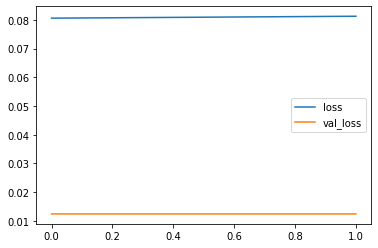

In [49]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

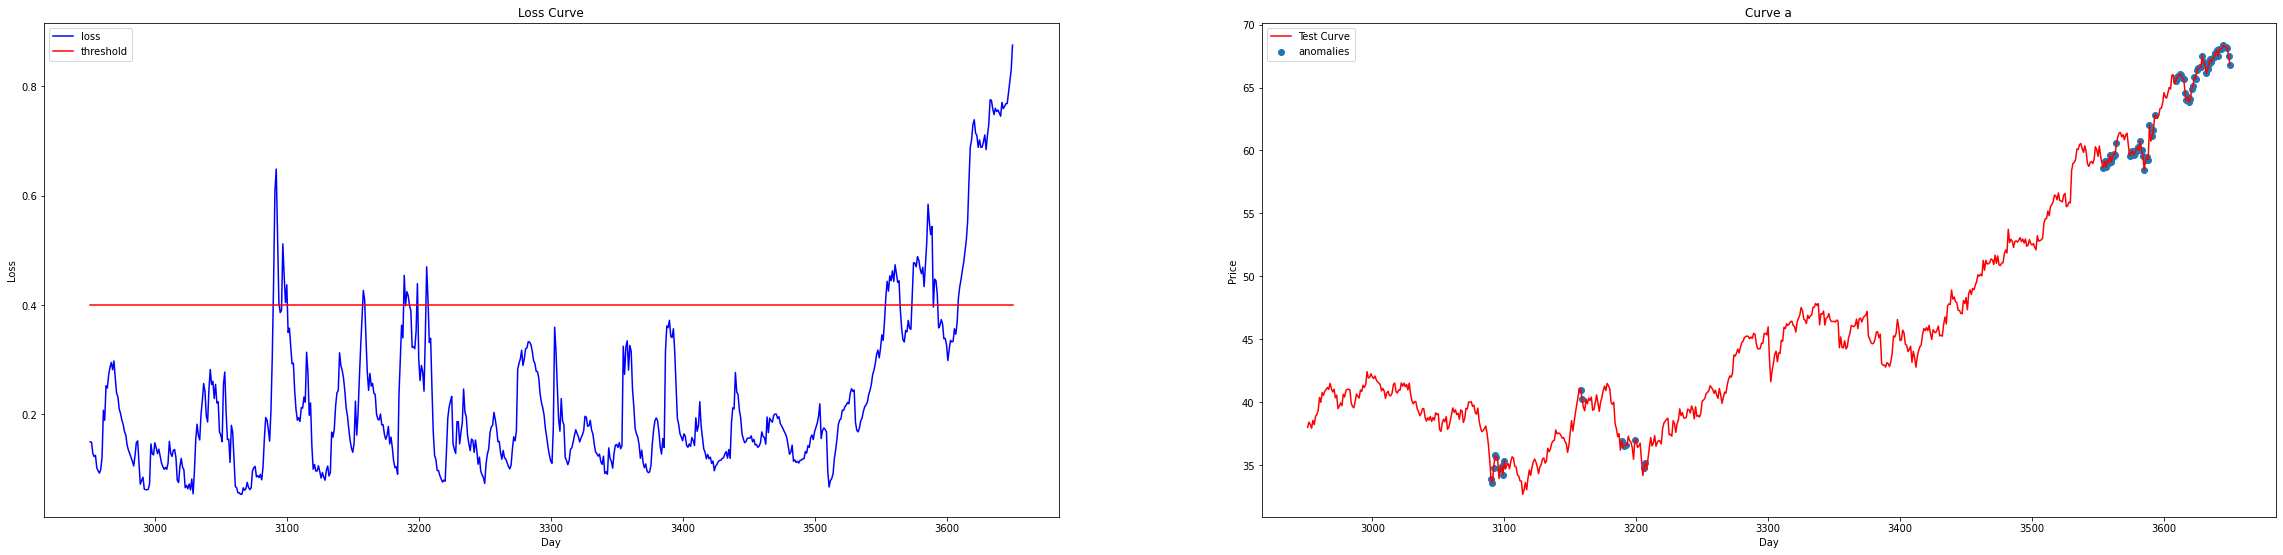

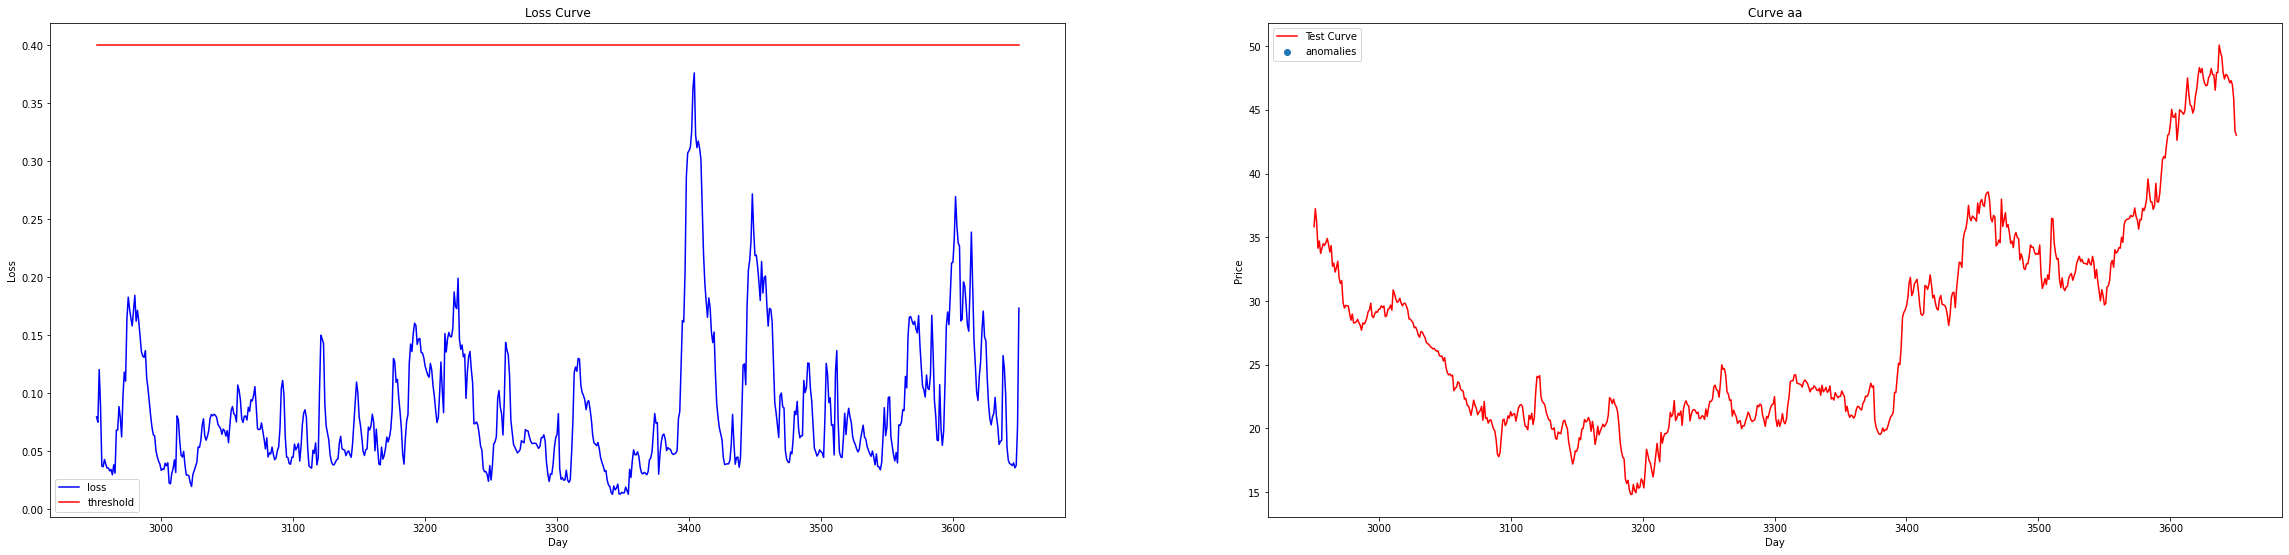

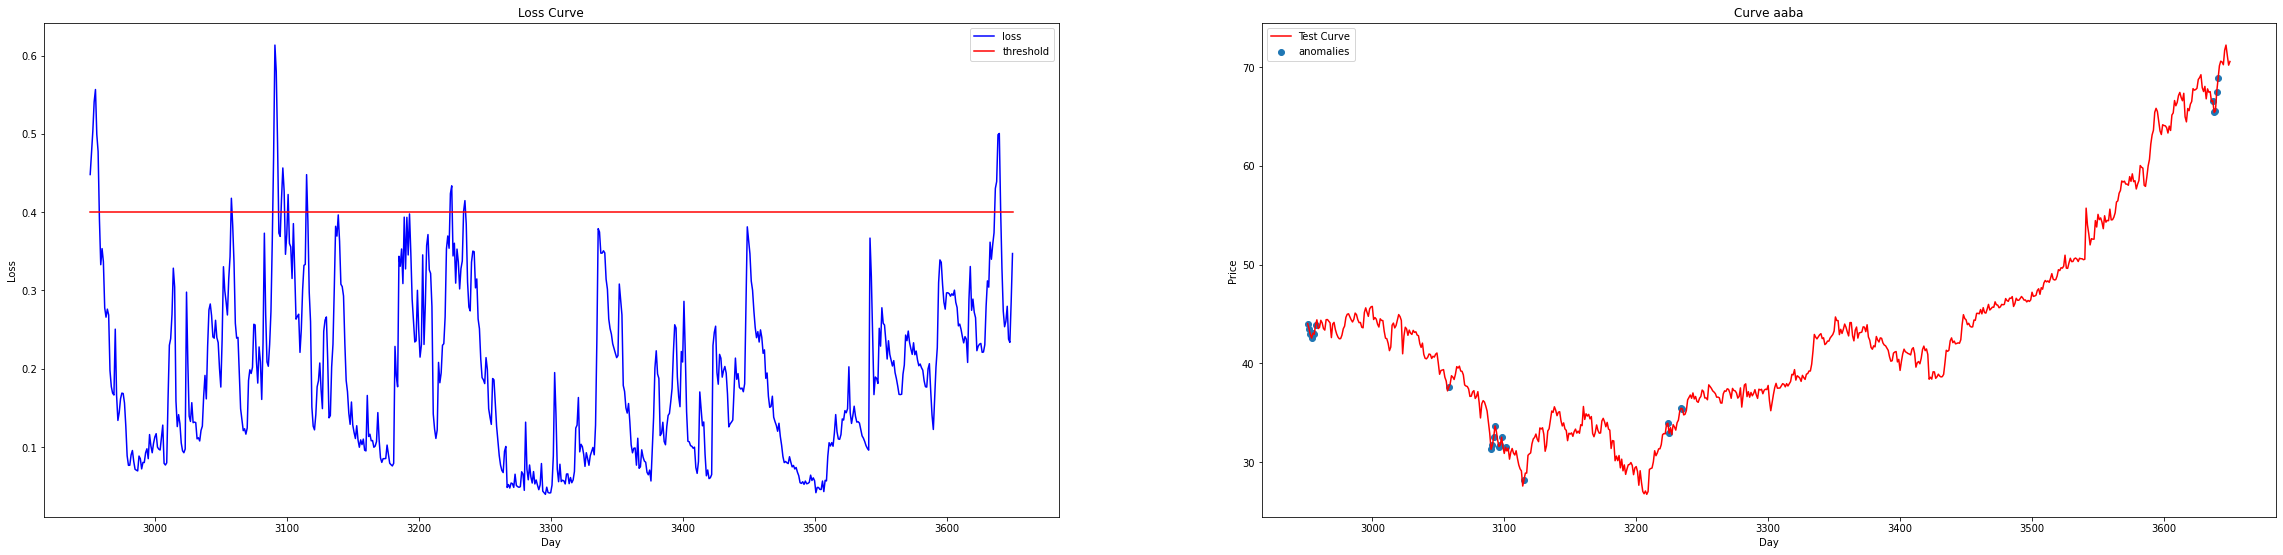

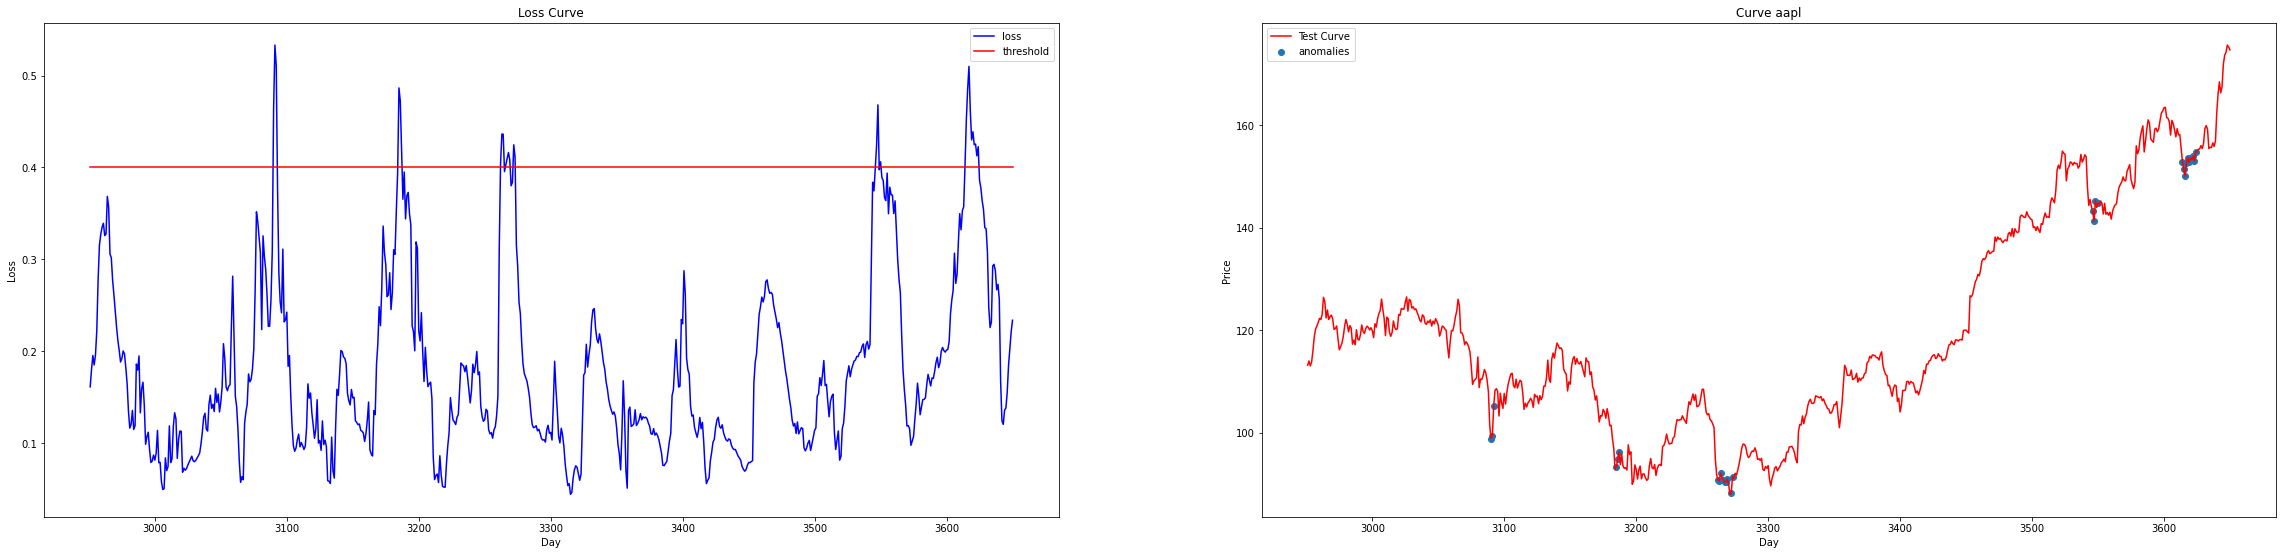

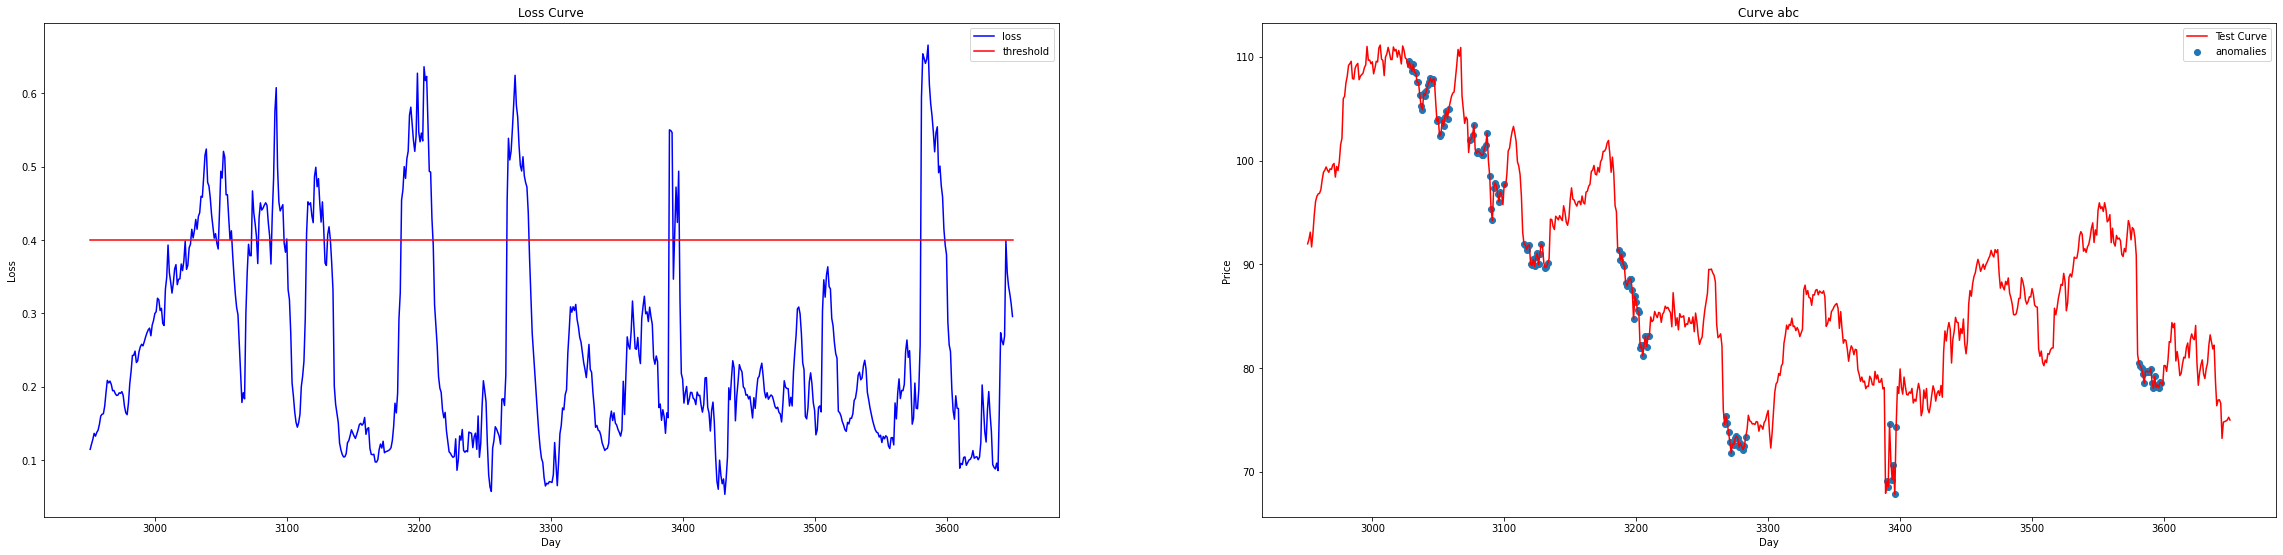

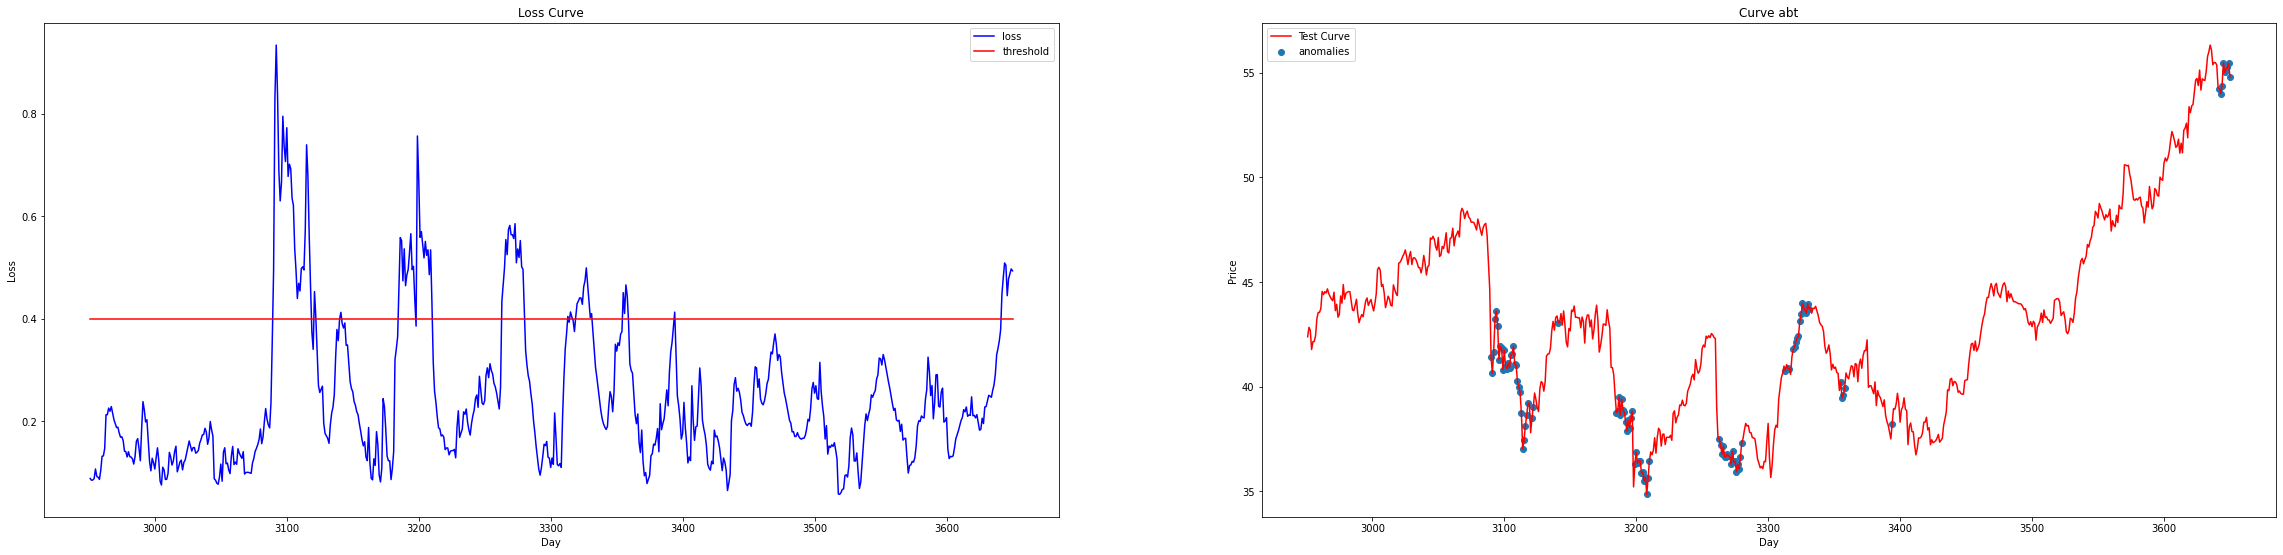

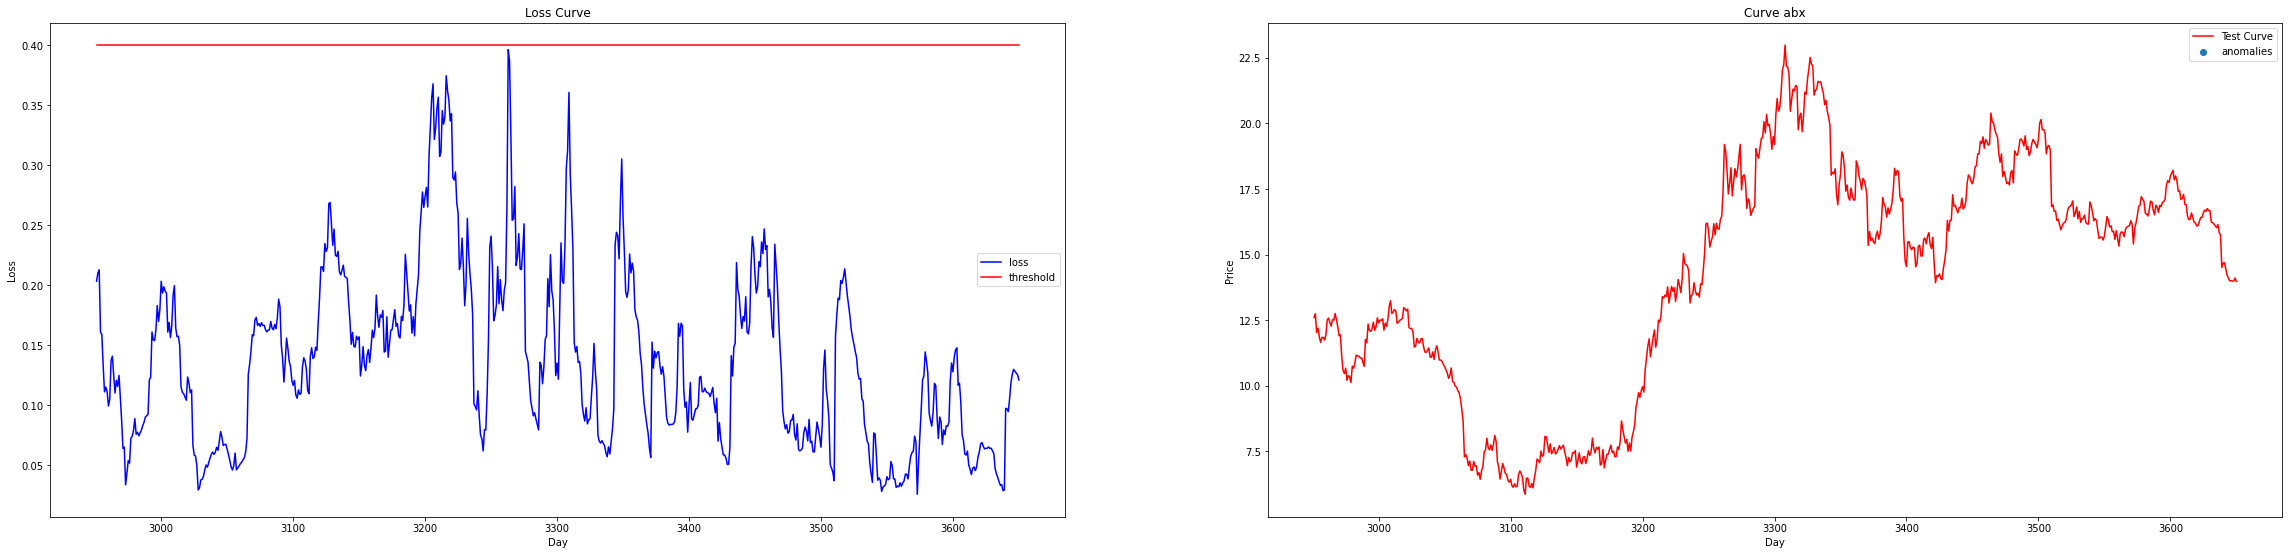

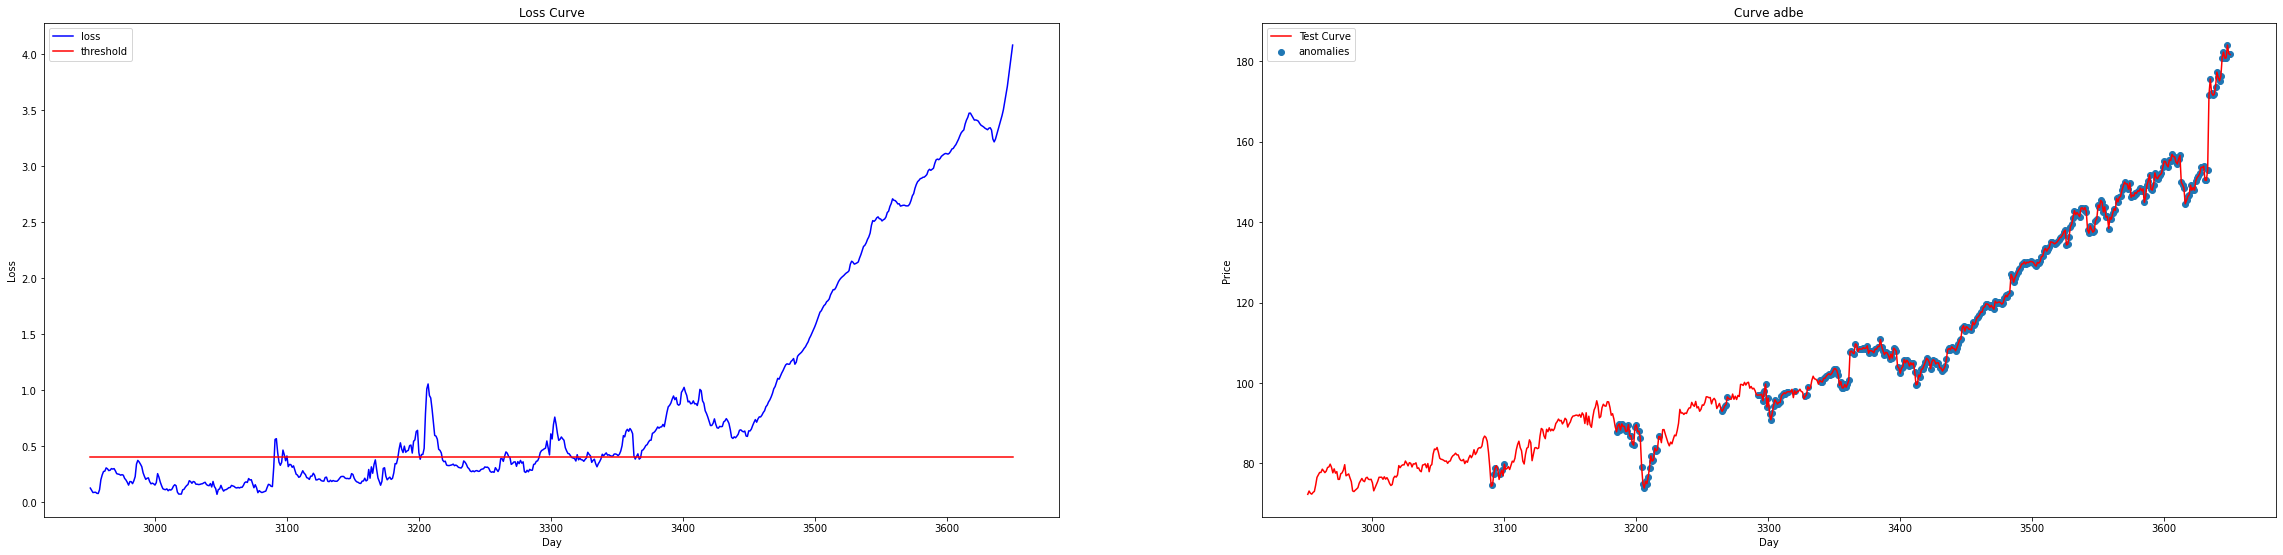

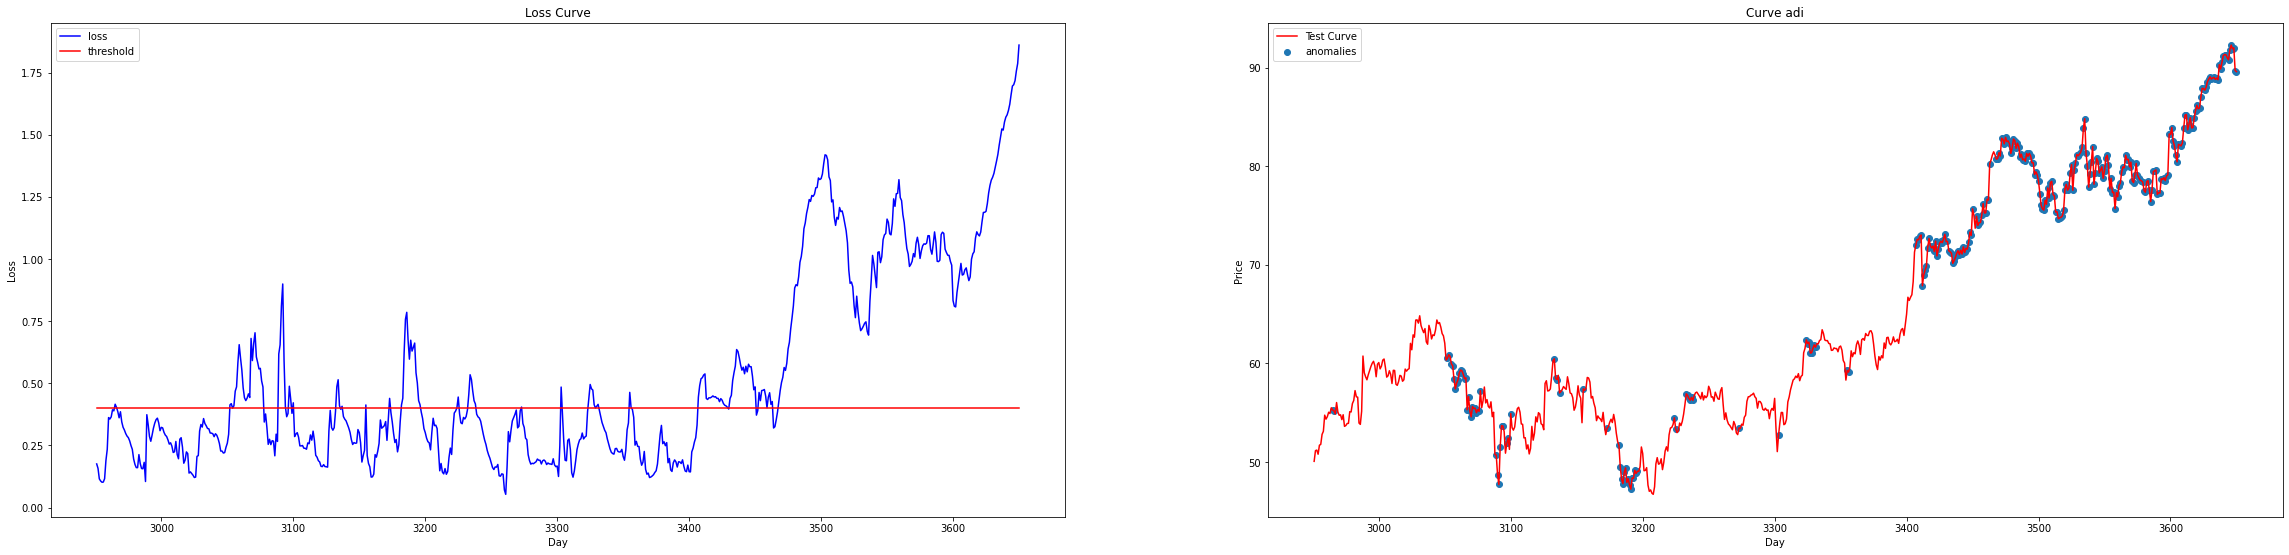

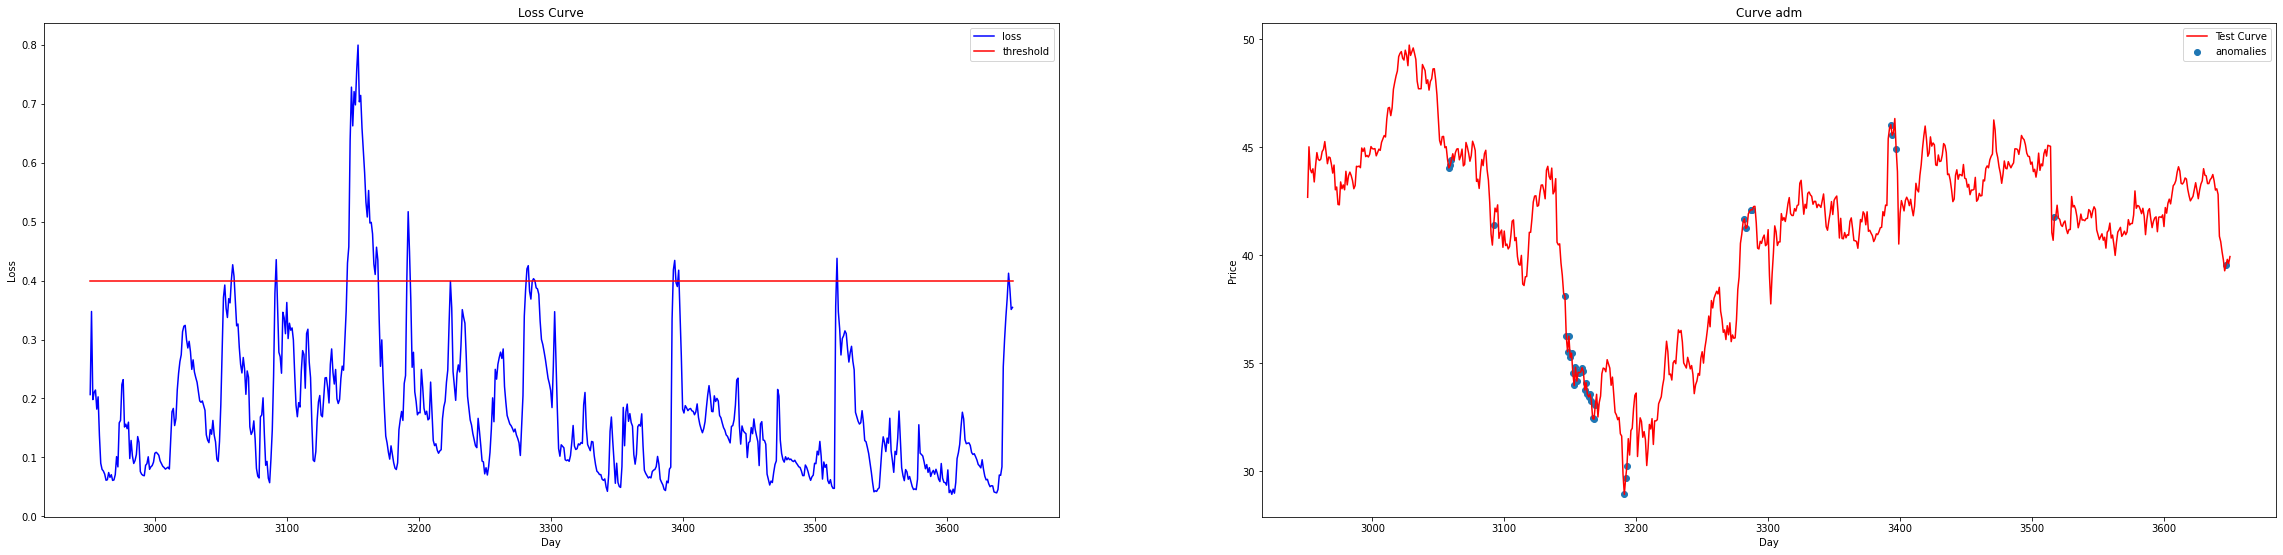

In [36]:
for i in range(0, n):
  X_test_pred = model.predict(X_Test[i])

  test_mae_loss = np.mean(np.abs(X_test_pred - X_Test[i]), axis=1)

  test_score_df = pd.DataFrame(index=range(train_size + TIME_STEPS+1, df.shape[1]))

  test_score_df['loss'] = test_mae_loss

  test_score_df['threshold'] = THRESHOLD

  test_score_df['anomaly'] = test_score_df.loss > test_score_df.threshold

  test_score_df['close'] = df.iloc[i, train_size+1:df.shape[1]]

  anomalies = test_score_df[test_score_df.anomaly == True]

  fig = plt.figure(figsize=(40,20))
  ax1 = fig.add_subplot(221)
  ax2 = fig.add_subplot(222)
  ax1.plot([x for x in range(train_size + TIME_STEPS+1, df.shape[1])],  test_score_df.loss, color = "blue", label = "loss")
  ax1.plot([x for x in range(train_size + TIME_STEPS+1, df.shape[1])],  test_score_df.threshold, color = "red", label = "threshold")
  ax1.title.set_text('Loss Curve')
  ax1.set_xlabel('Day')
  ax1.set_ylabel('Loss')
  ax1.legend()

  ax2.scatter(test_score_df[test_score_df.anomaly == True].index.tolist(), test_score_df[test_score_df.anomaly == True]['close'].tolist(),
            marker='o', label = "anomalies")
  ax2.plot([x for x in range(train_size + TIME_STEPS+1, df.shape[1])],  test_score_df.close, color = "red", label = "Test Curve")
  ax2.title.set_text('Curve ' + df.iloc[i, 0])
  ax2.set_xlabel('Day')
  ax2.set_ylabel('Price')
  ax2.legend()
  plt.show()